In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Load the Wine dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))


In [7]:
# 1. EDA
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


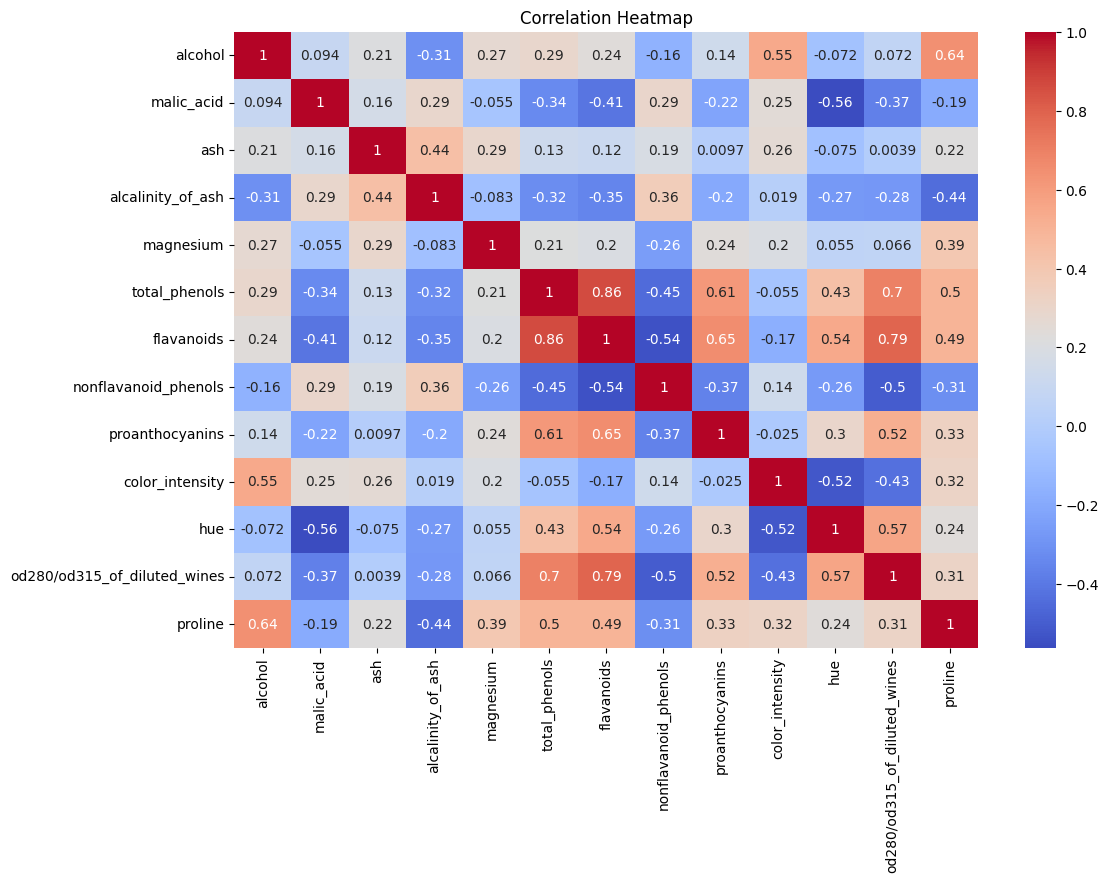

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop('target', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

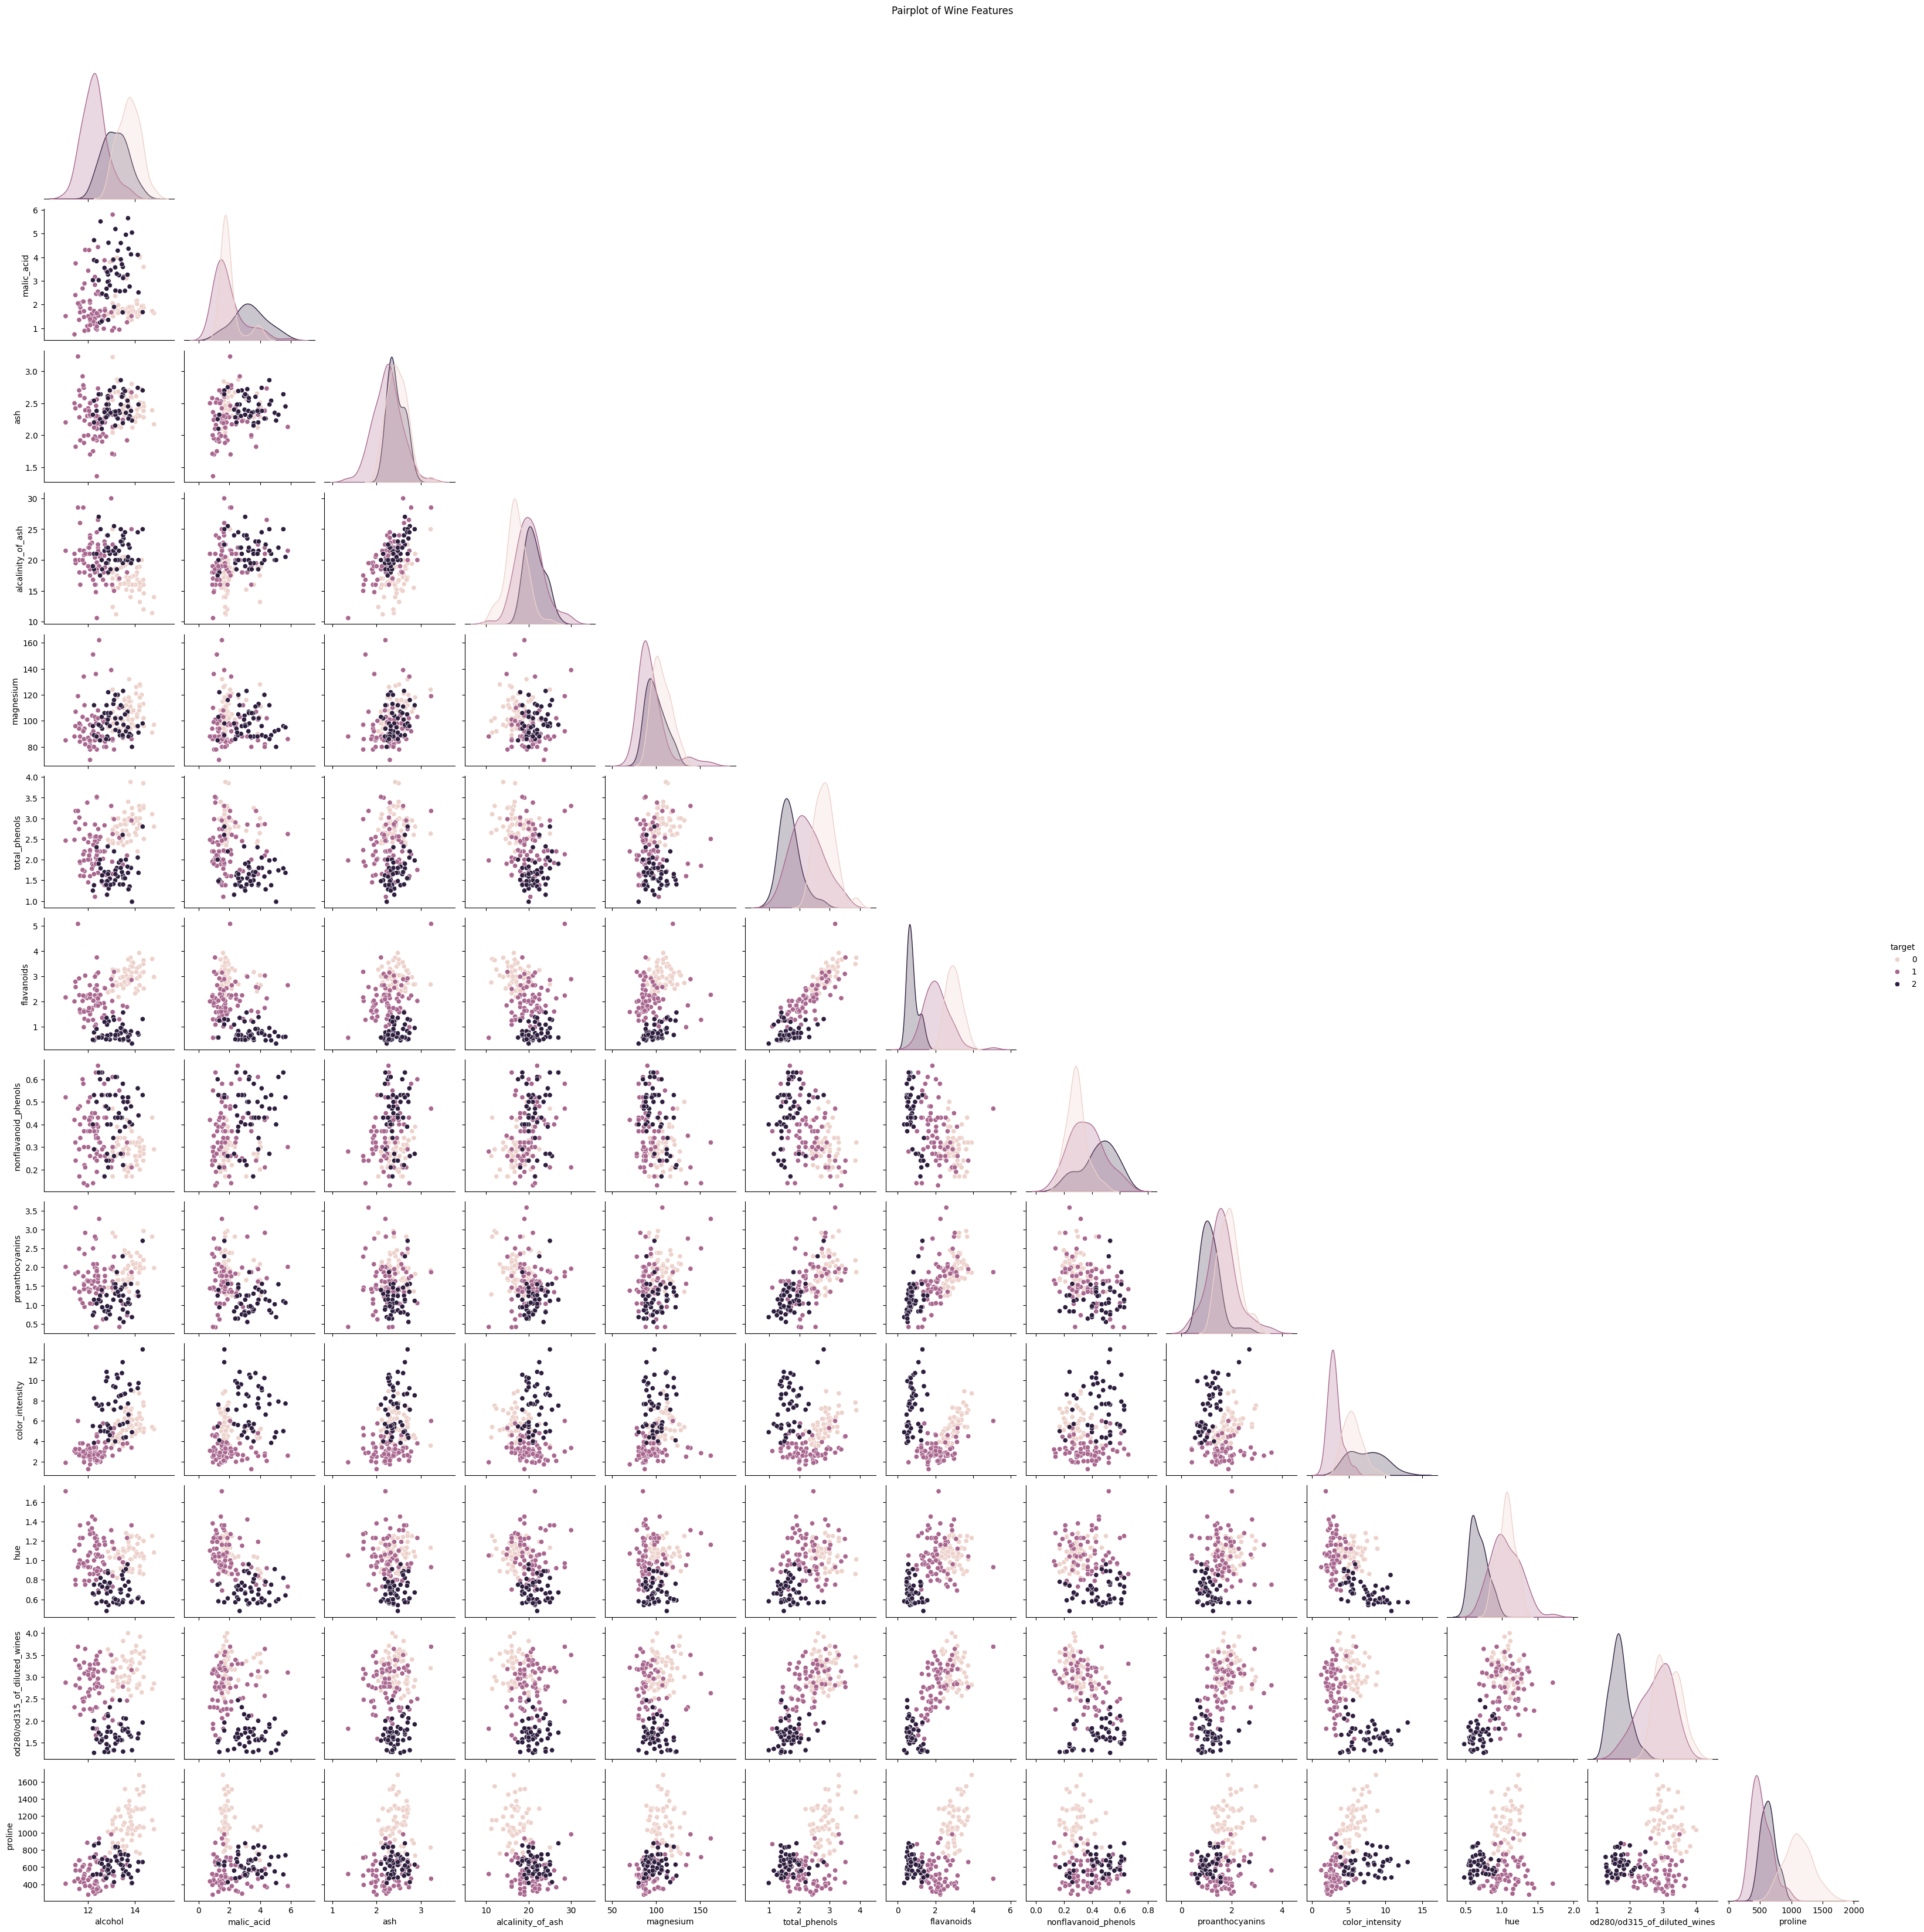

In [9]:
# Pairplot
sns.pairplot(df, hue='target', corner=True)
plt.suptitle("Pairplot of Wine Features", y=1.02)
plt.show()

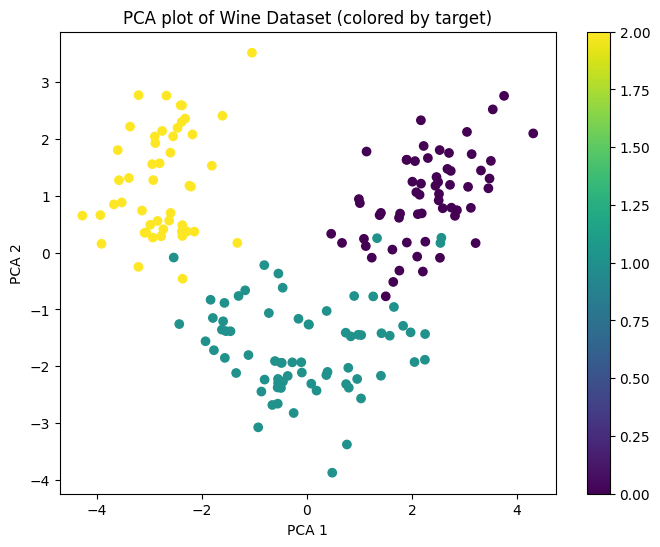

In [10]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['target'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA plot of Wine Dataset (colored by target)')
plt.colorbar()
plt.show()

In [11]:
# 2. K-Means Clustering
inertia = []
sil_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

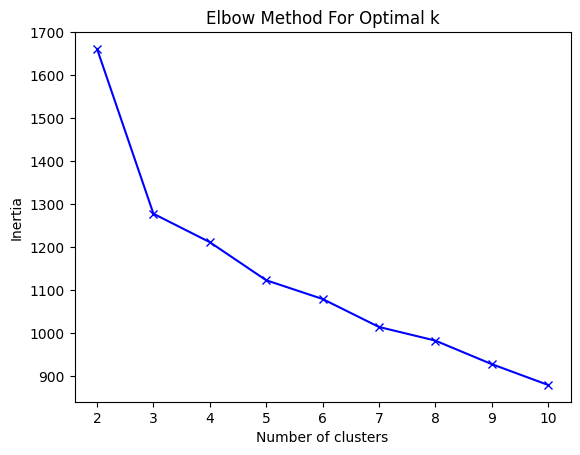

In [12]:
# Elbow method
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

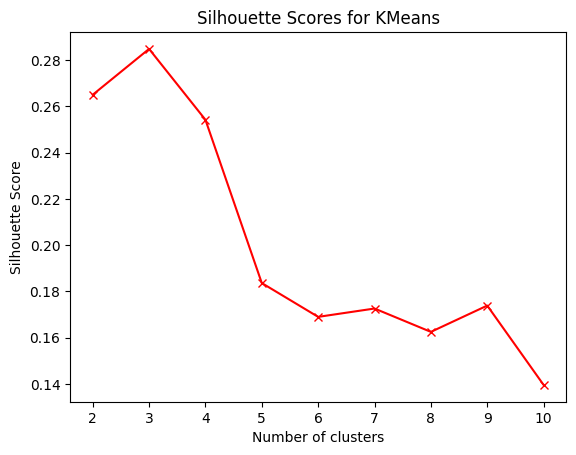

In [13]:
# Silhouette scores
plt.plot(k_range, sil_scores, 'rx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for KMeans')
plt.show()

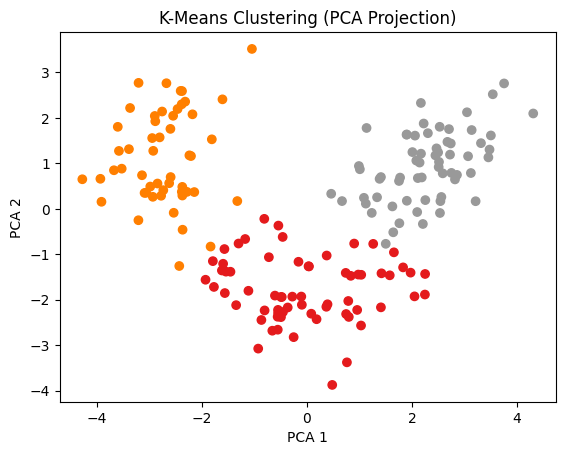

In [14]:
# Best K
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Set1')
plt.title('K-Means Clustering (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

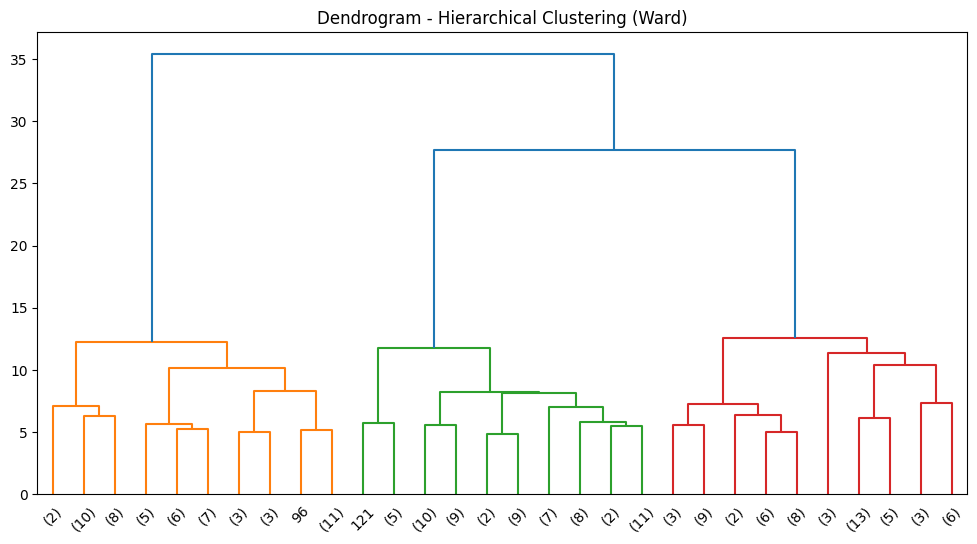

In [15]:
# 3. Hierarchical Clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Dendrogram - Hierarchical Clustering (Ward)')
plt.show()

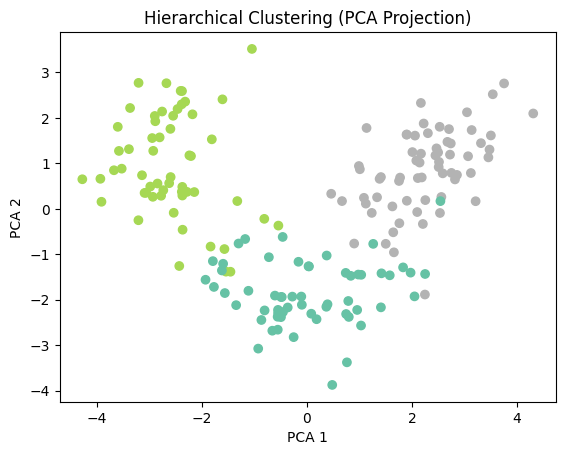

In [16]:
hier_clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier_labels = hier_clust.fit_predict(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hier_labels, cmap='Set2')
plt.title('Hierarchical Clustering (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

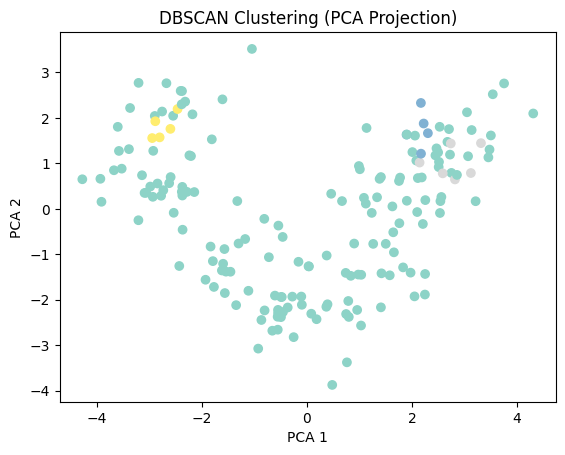

In [17]:
# 4. DBSCAN
dbscan = DBSCAN(eps=1.6, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='Set3')
plt.title('DBSCAN Clustering (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [18]:

# 5. Compare Clustering Results
df['KMeans'] = kmeans_labels
df['Hierarchical'] = hier_labels
df['DBSCAN'] = dbscan_labels

In [19]:
print("Cluster means (KMeans):")
display(df.groupby('KMeans').mean())

print("Cluster means (Hierarchical):")
display(df.groupby('Hierarchical').mean())

print("Cluster summary (DBSCAN):")
display(df['DBSCAN'].value_counts())


Cluster means (KMeans):


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,Hierarchical,DBSCAN
KMeans,,,,,,,,,,,,,,,,
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231,1.000000,0.169231,-1.000000
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,1.941176,1.000000,-0.705882
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,0.048387,1.967742,-0.725806


Cluster means (Hierarchical):


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,KMeans,DBSCAN
Hierarchical,,,,,,,,,,,,,,,,
0,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034,1.000000,0.034483,-1.000000
1,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429,1.857143,0.910714,-0.732143
2,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875,0.078125,1.906250,-0.734375


Cluster summary (DBSCAN):


,count
DBSCAN,
-1,162
1,6
0,5
2,5


In [20]:
# 6. Summarize Insights
print("Silhouette Score (KMeans):", silhouette_score(X_scaled, kmeans_labels))
print("Silhouette Score (Hierarchical):", silhouette_score(X_scaled, hier_labels))
print("Silhouette Score (DBSCAN, ignoring noise):",
      silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]))

Silhouette Score (KMeans): 0.2848589191898987
Silhouette Score (Hierarchical): 0.2774439826952266
Silhouette Score (DBSCAN, ignoring noise): 0.5020707127556026
